In [1]:
import pandas as pa
import seaborn as sns
import nltk
import regex as re
from collections import Counter

from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
df = pa.read_csv('movie_review.csv')

In [3]:
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [4]:
df.columns

Index(['fold_id', 'cv_tag', 'html_id', 'sent_id', 'text', 'tag'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64720 entries, 0 to 64719
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fold_id  64720 non-null  int64 
 1   cv_tag   64720 non-null  object
 2   html_id  64720 non-null  int64 
 3   sent_id  64720 non-null  int64 
 4   text     64720 non-null  object
 5   tag      64720 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.0+ MB


In [6]:
df.describe()

,fold_id,html_id,sent_id
count,64720.000000,64720.000000,64720.00000
mean,4.549382,16074.097373,18.98118
std,2.853176,7175.282521,15.08369
min,0.000000,42.000000,0.00000
25%,2.000000,10613.000000,8.00000
50%,5.000000,15091.000000,16.00000
75%,7.000000,21865.000000,27.00000
max,9.000000,29867.000000,111.00000


In [7]:
df.dtypes

fold_id     int64
cv_tag     object
html_id     int64
sent_id     int64
text       object
tag        object
dtype: object

## Check for null

In [8]:
df.isna().sum()

fold_id    0
cv_tag     0
html_id    0
sent_id    0
text       0
tag        0
dtype: int64

In [10]:
df['text']=df['text'].str.upper()

In [13]:
df['length'] = df['text'].str.len()
df.describe()

,fold_id,html_id,sent_id,length
count,64720.000000,64720.000000,64720.00000,64720.000000
mean,4.549382,16074.097373,18.98118,118.273501
std,2.853176,7175.282521,15.08369,71.551265
min,0.000000,42.000000,0.00000,1.000000
25%,2.000000,10613.000000,8.00000,68.000000
50%,5.000000,15091.000000,16.00000,107.500000
75%,7.000000,21865.000000,27.00000,155.000000
max,9.000000,29867.000000,111.00000,887.000000


<Axes: >

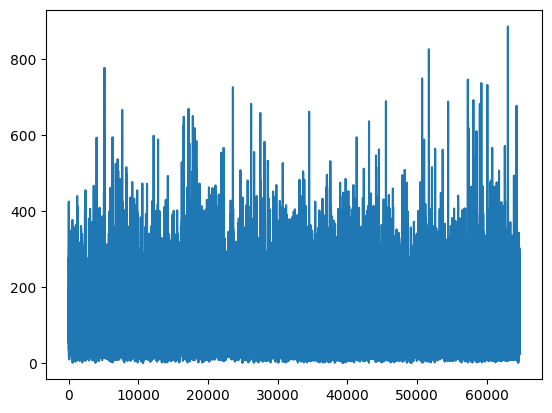

In [14]:
df['length'].plot()

<Axes: >

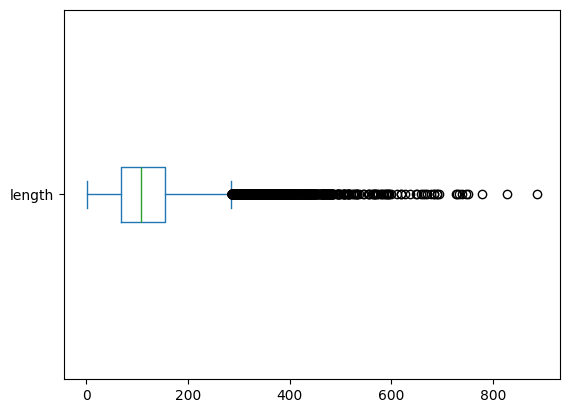

In [15]:
df['length'].plot(kind='box', vert=False)

## Histogram

<Axes: ylabel='Frequency'>

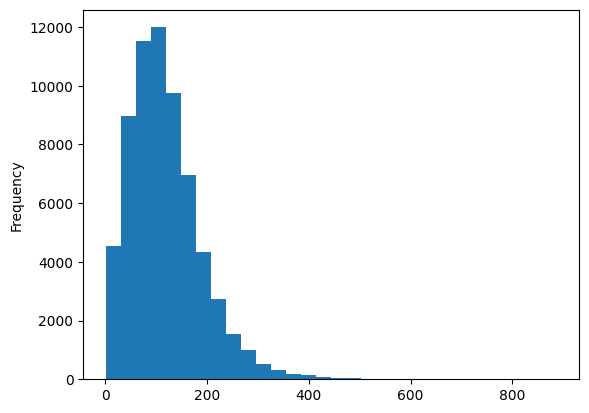

In [16]:
df['length'].plot(kind='hist', bins=30)

## Tokenization

In [17]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'now', 'm', 'more', "she's", "it's", "shouldn't", 'but', 's', 'that', 'up', 'itself', 'doesn', 've', 'were', 'why', "shan't", 'she', 'down', 'while', 'so', 'nor', 'aren', 'was', 'too', 'and', 'myself', 'under', 'the', 'if', 'your', 'didn', "needn't", 'had', "you'll", 'through', 'them', 'our', 'then', 'shan', 'at', 'd', "hasn't", 'over', 'him', 'a', 'where', 'all', 'what', 'i', "you're", 'my', 'his', 'are', 'isn', 'these', 'who', 'am', 'being', 'by', 'between', 'wouldn', 'is', 'its', 'after', 'same', 'most', 'few', "didn't", "wasn't", 'their', 'ain', 'than', 'don', 'y', 'an', 'hasn', 'both', 'off', 'each', 'll', 'should', "don't", 'does', 'will', 'which', 'we', 'yours', 'against', 'it', 'or', 'from', 'won', 'this', 'how', 'mightn', "isn't", 'in', 't', "you'd", "wouldn't", 'above', 'they', 'with', 'ourselves', 'ma', 'other', 'do', 'needn', 'me', 'herself', 'o', 'own', 'haven', 'having', "hadn't", 'very', 'himself', 'only', 'has', "mightn't", 'because', "should've", 'couldn', 'yourself',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gragh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def tokenize(Review):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Review)

In [19]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)

In [20]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [21]:
pipeline = [str.lower, tokenize, remove_stop]

In [22]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [24]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [25]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,fold_id,cv_tag,html_id,sent_id,text,tag,length,tokens,num_tokens
64715,9,cv999,14636,20,THAT LACK OF INSPIRATION CAN BE TRACED BACK TO...,neg,82,"[lack, inspiration, traced, back, insipid, cha...",6
64716,9,cv999,14636,21,LIKE TOO MANY OF THE SKITS ON THE CURRENT INCA...,neg,241,"[like, many, skits, current, incarnation, _sat...",20
64717,9,cv999,14636,22,"AFTER WATCHING ONE OF THE "" ROXBURY "" SKITS ON...",neg,151,"[watching, one, roxbury, skits, snl, come, awa...",11
64718,9,cv999,14636,23,"BUMP UNSUSPECTING WOMEN , AND . . . THAT'S ALL .",neg,48,"[bump, unsuspecting, women]",3
64719,9,cv999,14636,24,"AFTER WATCHING _A_NIGHT_AT_THE_ROXBURY_ , YOU'...",neg,80,"[watching, _a_night_at_the_roxbury_, left, exa...",4


# Word frequencyAnalysis

In [26]:
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [27]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [28]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('film', 9436), ('movie', 5667), ('one', 5577), ('like', 3545), ('even', 2555)]


In [29]:
freq_df = pa.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [30]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
film,9436
movie,5667
one,5577
like,3545
even,2555
good,2320
time,2282
story,2143
would,2066


In [31]:
freq_df.describe()

,freq
count,45703.000000
mean,15.156882
std,91.508762
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,9436.000000


## BarChart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

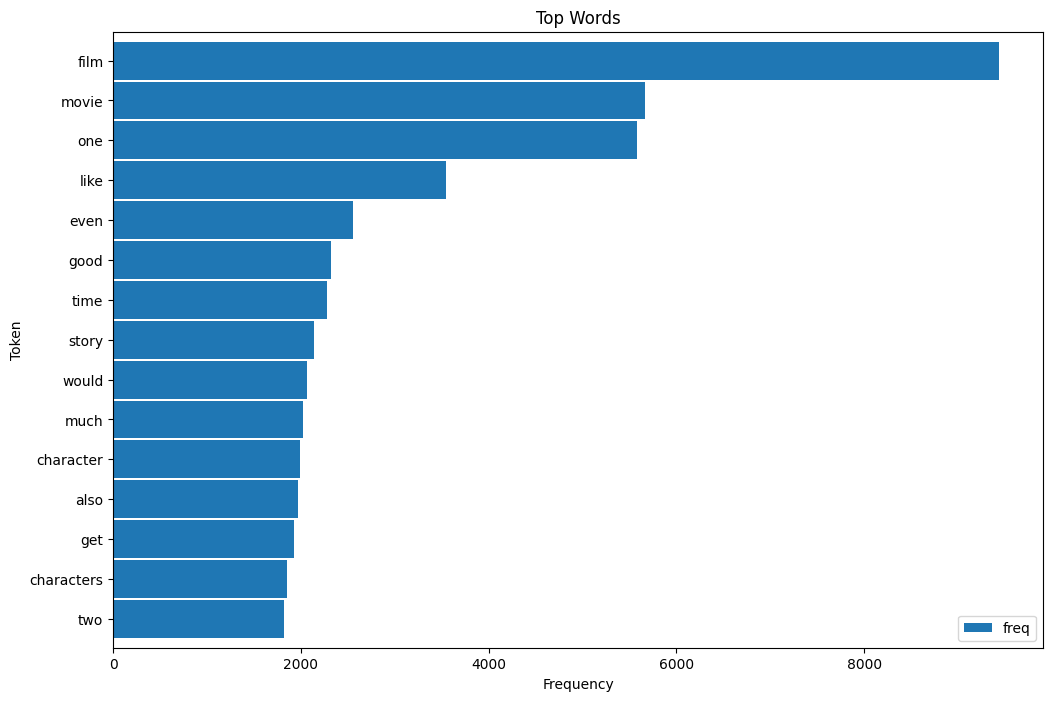

In [32]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [35]:
text = df.query("sent_id>1")['text'].values[0]

# WorldCloud

(-0.5, 399.5, 199.5, -0.5)

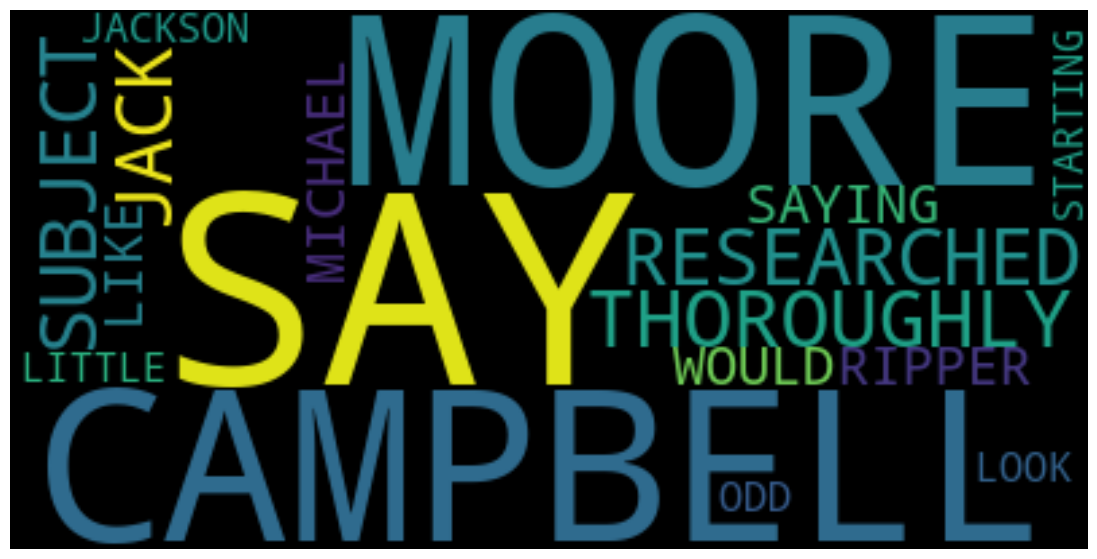

In [36]:
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

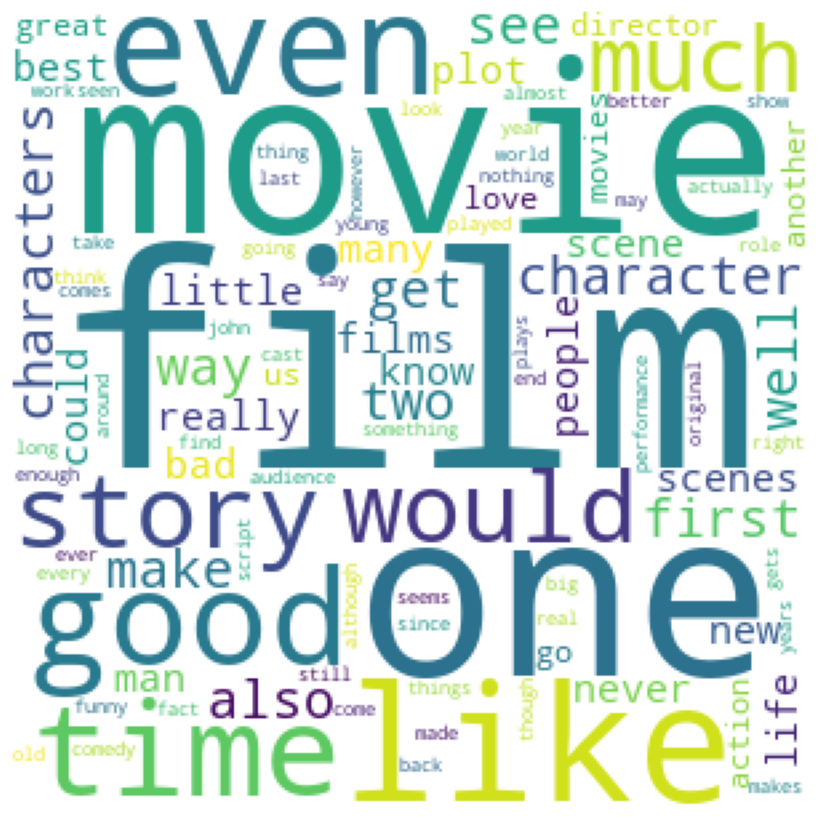

In [37]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()